In [6]:
import datetime
import pathlib

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import earthaccess
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

In [2]:
!pip install pathlib

In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 109.5 MB/s eta 0:00:00


In [4]:
!pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 101.4 MB/s eta 0:00:00


In [5]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.0 MB/s eta 0:00:00


In [7]:
earthaccess.login() # Login with your EDL credentials if asked

Enter your Earthdata Login username: chhandana
Enter your Earthdata password: ··········


In [8]:
# Search and locate granules
granule_info = earthaccess.search_data(
    short_name="SWOT_L4_DAWG_SOS_DISCHARGE",
    temporal=("2024-04-07", "2025-04-26"),
)
granule_info



[Collection: {'Version': '1', 'ShortName': 'SWOT_L4_DAWG_SOS_DISCHARGE'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -166.397, 'SouthBoundingCoordinate': 8.09, 'EastBoundingCoordinate': 8.09, 'NorthBoundingCoordinate': 82.311}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-04-20T05:36:29.000Z', 'BeginningDateTime': '2023-03-29T08:52:24.000Z'}}
 Size(MB): 1927.0171918869019
 Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_results.nc', 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_priors.nc'],
 Collection: {'Version': '1', 'ShortName': 'SWOT_L4_DAWG_SOS_DISCHARGE'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -166.397, 'SouthB

In [9]:
# Enter a directory path to store downloaded data in
downloads_dir = pathlib.Path("data_downloads")
downloads_dir.mkdir(parents=True, exist_ok=True)

# Select a priors and results pair to explore
download_links = [[link for link in earthaccess.results.DataGranule.data_links(granule)] for granule in granule_info]
print("Select a priors and results file to explore:")
for downloads in download_links:
    for download in downloads:
        if "priors" in download: print(download)



Select a priors and results file to explore:
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240726T123358_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v16_SOS_unconstrained_0001_20240726T123345_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/sa_sword_v16_SOS_unconstrained_0001_20240726T123343_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/af_sword_v16_SOS_unconstrained_0001_20240726T123343_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/oc_sword_v16_SOS_unconstrained_0001_20240726T123327_prior

In [10]:
# Select Europe ("eu") priors file to work with
priors_link = "https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v15_SOS_unconstrained_0001_20240228T205029_priors.nc"

# Select results
results_link = priors_link.replace("priors", "results")

earthaccess.download(priors_link, downloads_dir)
earthaccess.download(results_link, downloads_dir)



QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['data_downloads/eu_sword_v15_SOS_unconstrained_0001_20240228T205029_results.nc']

In [11]:
# Open downloaded files to access SoS granule data
priors_download = priors_link.split('/')[-1]
results_download = results_link.split('/')[-1]

priors = nc.Dataset(downloads_dir.joinpath(priors_download), format="NETCDF4")
results = nc.Dataset(downloads_dir.joinpath(results_download), format="NETCDF4")

In [12]:
# Constants

# Select a river
RIVER_NAME = "Rhine"

# Select a discharge algorithm (hivdi, neobam, metroman, momma, sad, sic4dvar)
DISCHARGE_ALGORITHM = "hivdi"
DISCHARGE_VARIABLE = "Q"

In [13]:
# Display the priors groups
print("Priors Groups:")
print(priors.groups)

Priors Groups:
{'reaches': <class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches)
    groups: , 'nodes': <class 'netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes)
    groups: , 'model': <class 'netCDF4.Group'>
group /model:
    dimensions(sizes): num_months(12), probability(20)
    variables(dimensions): int32 num_months(num_months), int32 probability(probability), float64 flow_duration_q(num_reaches, probability), float64 max_q(num_reaches), float64 monthly_q(num_reaches, num_months), float64 mean_q(num_reaches), float64 min_q(num_reaches), float64 two_year_return_q(num_reaches), int32 area_estimate_flag(num_reaches)
    groups: , 'gbpriors': <class 'netCDF4.Group'>
group /gb

In [14]:
# Display the module groups
print("Results Groups:")
print(results.groups)

Results Groups:
{'reaches': <class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups: , 'nodes': <class 'netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes), int32 observations(num_nodes), float64 time(num_nodes)
    groups: , 'hivdi': <class 'netCDF4.Group'>
group /hivdi:
    dimensions(sizes): 
    variables(dimensions): float64 Q(num_reaches), float64 A0(num_reaches), float64 beta(num_reaches), float64 alpha(num_reaches)
    groups: , 'metroman': <class 'netCDF4.Group'>
group /metroman:
    dimensions(sizes): 
    variables(dimensions): float64 allq(num_reaches), float64 A0hat(num_reaches), float64 nahat(num

In [15]:
reaches = results.groups['reaches']    # Access the reaches group

print("Reaches Group")
print(reaches, "\n")

print("Longitude")
print(reaches.variables['x'])



Reaches Group
<class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups:  

Longitude
<class 'netCDF4.Variable'>
float64 x(num_reaches)
    long_name: longitude
    comment: longitude of the reach center decimal ranging from 180°E to 180°W
    units: degrees_east
    valid_min: -180.0
    valid_max: 180.0
    coverage_content_type: coordinate
path = /reaches
unlimited dimensions: 
current shape = (30768,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [16]:
# Unpack the spatial coordinates and river names
reach_lon = results.groups['reaches'].variables['x']
reach_lat = results.groups['reaches'].variables['y']

river_names = results.groups['reaches'].variables['river_name']

# Filter data to only find the river of interest
idx = np.where(river_names[:] == RIVER_NAME)
print(f"Indexes for {RIVER_NAME}:\n {idx}")

Indexes for Rhine:
 (array([12597, 12598, 12599, 12600, 12601, 12602, 12603, 12606, 12616,
       12617, 12618, 12619, 12620, 12621, 12622, 12623, 12624, 12625,
       12626, 12627, 12628, 12629, 12630, 12631, 12634, 12635, 12636,
       12638, 12639, 12640, 12769, 12918, 12919, 12920, 12923, 12924,
       12925, 12926, 12931, 12932, 12933, 12938, 12939, 12940, 12941,
       12942, 12943, 12944, 13098, 13099, 13100, 13101, 13102, 13152,
       13153, 13154, 13155, 13156, 13157, 13158, 13159, 13160, 13161,
       13162, 13163, 13164, 13165, 13166, 13168, 13169, 13170, 13172,
       13173, 13174, 13175, 13176, 13177, 13178, 13179, 13180, 13181,
       13182, 13183, 13184, 13185, 13186, 13187, 13188, 13189, 13190,
       13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199,
       13200, 13201, 13202, 13204, 13205, 13206, 13207, 13208, 13316,
       13317, 13319, 13324, 13325, 13326, 13327, 13328, 13329, 13330,
       13331, 13332, 13333, 13334, 13335, 13336, 13337, 13339, 13340,

Text(0.5, 1.0, 'Rhine Reach Centerpoint Locations')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


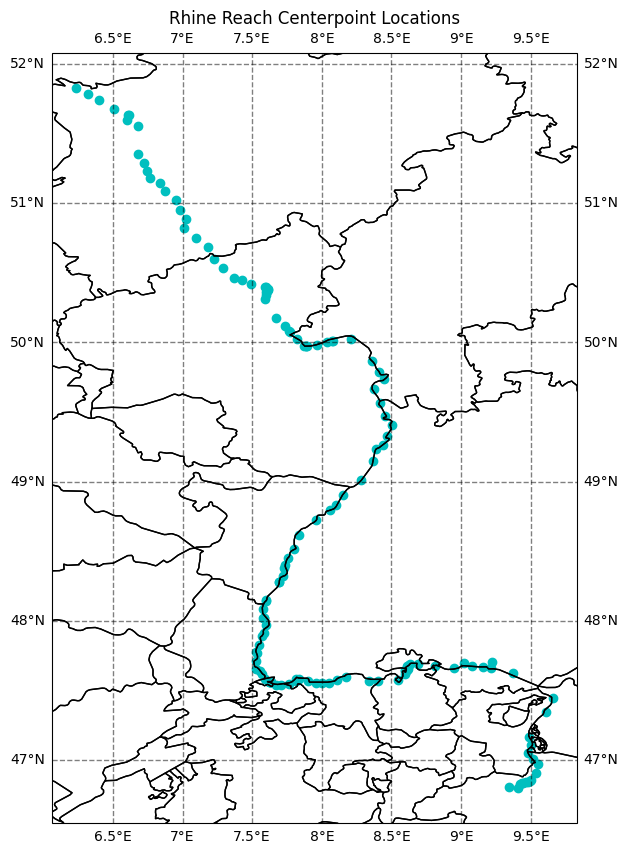

In [17]:
# Plot the location of the river
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(reach_lon[idx], y=reach_lat[idx], color='c')

# Add the title
plt.title(f'{RIVER_NAME} Reach Centerpoint Locations')


In [18]:
# Locate the indexes for the specific river you are interested in
river_names = results['reaches']['river_name'][:]
reach_idx = np.where(river_names[:] == RIVER_NAME)

# Locate the reach identifiers for the river name
reach_identifiers = results['reaches']['reach_id'][reach_idx]

# Locate the reach identifiers of interest on the node-level
reach_node_identifiers = results['nodes']['reach_id'][:]
node_idx = []
for reach_identifier in reach_identifiers:
    node_idx.extend(np.where(reach_node_identifiers == reach_identifier)[0])

# Locate the node identifiers of interest using the reach identifiers to index
node_identifiers = results['nodes']['node_id'][:]
print(f"Node identifiers: {node_identifiers}")

Node identifiers: [21101200010013 21101200010023 21101200010033 ... 29690900020221
 29690900020231 29690900030746]


In [19]:
# Unpack the spatial coordinates on the node level and index to values of interest
node_lon = results['nodes']['x'][node_idx]
node_lat = results['nodes']['y'][node_idx]
print(f"Longitude #: {node_lon.shape}")
print(f"Latitude #: {node_lat.shape}")

Longitude #: (4620,)
Latitude #: (4620,)


Text(0.5, 1.0, 'Rhine Node Centerpoint Locations')

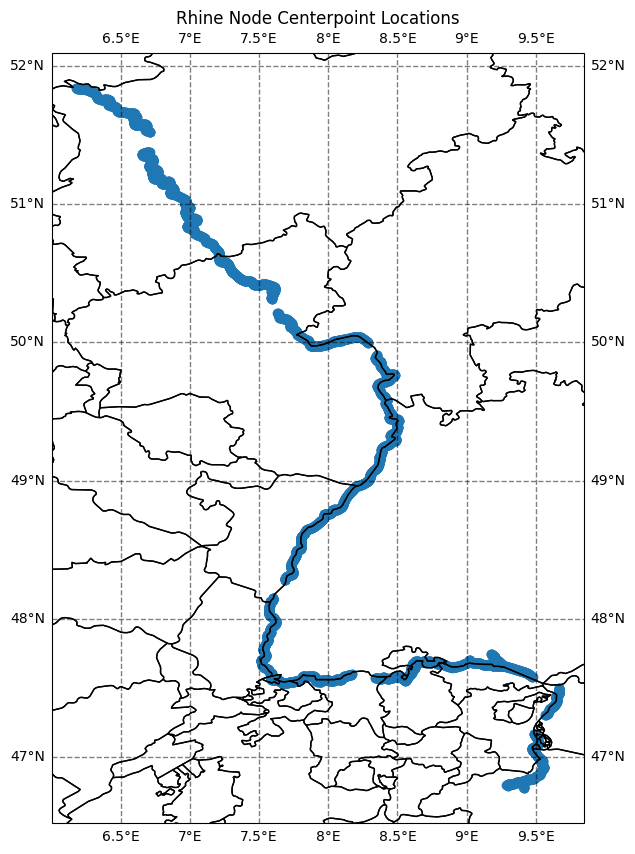

In [20]:
# Plot the nodes
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(x=node_lon, y=node_lat)

# Add the title
plt.title(f'{RIVER_NAME} Node Centerpoint Locations')



In [21]:
# Retrieve discharge from discharge algorithm group
discharge_algo_q = results[DISCHARGE_ALGORITHM][DISCHARGE_VARIABLE][:]

# Save the missing value
missing = results[DISCHARGE_ALGORITHM][DISCHARGE_VARIABLE].missing_value

# Loop through each reach and filter out places where the missing value is present
data_indexes = []
for i in range(discharge_algo_q.shape[0]):
    if discharge_algo_q[i].shape[0] > 1:
        if np.any(discharge_algo_q[i] != missing): data_indexes.append(i) # For multiple time steps with non-missing values
    if discharge_algo_q[i].shape[0] == 1 and discharge_algo_q[i] != missing: data_indexes.append(i)  # For one time step with non-missing value

# Display the numeric indexes where discharge data is present
print(f"10 indexes for locations that have values:\n {data_indexes[:10]}")



10 indexes for locations that have values:
 [12635, 12636, 12639, 12769, 12773, 12919, 12922, 12925, 12930, 12931]


In [22]:
reach_identifiers = results['reaches']['reach_id'][data_indexes]
print(f"10 reach identifiers for locations that have values:\n {reach_identifiers[:10]}")

10 reach identifiers for locations that have values:
 [23261000571 23261000581 23261000631 23262000011 23262000051 23263000021
 23263000051 23263000081 23263000131 23263000141]


In [23]:
# Review what river names are present in the data
print("10 River Names")
print(river_names[data_indexes[:10]])

river_indexes = np.where(river_names  == RIVER_NAME)
print(f"\nIndexes for the {RIVER_NAME}")
print(river_indexes)

# Locate overlap
overlap_indexes = np.intersect1d(data_indexes, river_indexes)
print(f"\nOverlapping indexes for the {RIVER_NAME} with {DISCHARGE_ALGORITHM.upper()} Discharge data")
print(overlap_indexes)

10 River Names
['Rhine' 'Rhine' 'Rhine' 'Rhine' 'Mosel' 'Rhine' 'Lahn; Rhine' 'Rhine'
 'Lahn' 'Rhine']

Indexes for the Rhine
(array([12597, 12598, 12599, 12600, 12601, 12602, 12603, 12606, 12616,
       12617, 12618, 12619, 12620, 12621, 12622, 12623, 12624, 12625,
       12626, 12627, 12628, 12629, 12630, 12631, 12634, 12635, 12636,
       12638, 12639, 12640, 12769, 12918, 12919, 12920, 12923, 12924,
       12925, 12926, 12931, 12932, 12933, 12938, 12939, 12940, 12941,
       12942, 12943, 12944, 13098, 13099, 13100, 13101, 13102, 13152,
       13153, 13154, 13155, 13156, 13157, 13158, 13159, 13160, 13161,
       13162, 13163, 13164, 13165, 13166, 13168, 13169, 13170, 13172,
       13173, 13174, 13175, 13176, 13177, 13178, 13179, 13180, 13181,
       13182, 13183, 13184, 13185, 13186, 13187, 13188, 13189, 13190,
       13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199,
       13200, 13201, 13202, 13204, 13205, 13206, 13207, 13208, 13316,
       13317, 13319, 13324, 13325

In [24]:
# Select the first reach from the overlapping indexes
data_index = overlap_indexes[0]

# Locate the reach identifier
reach_id = reaches['reach_id'][data_index]
print(f"{RIVER_NAME} reach identifier to plot: {reach_id}")

# Retrieve discharge
discharge_algo_q = discharge_algo_q[data_index]
print(f"\nDischarge for {RIVER_NAME} reach identifier # {reach_id}")
print(discharge_algo_q)

# Retrieve time
time = results['reaches']['time'][data_index]
print(f"\nTime for {RIVER_NAME} reach identifier # {reach_id}")
print(results['reaches']['time'][data_index])

Rhine reach identifier to plot: 23261000571

Discharge for Rhine reach identifier # 23261000571
[-1.00000000e+12 -1.00000000e+12 -1.00000000e+12 -1.00000000e+12
 -1.00000000e+12 -1.00000000e+12 -1.00000000e+12 -1.00000000e+12
 -1.00000000e+12  5.40782194e+01  4.99487494e+01  3.42913882e+01
  3.44913537e+01]

Time for Rhine reach identifier # 23261000571
[7.34223036e+08 7.34308874e+08 7.34394712e+08 7.34909740e+08
 7.34995578e+08 7.35081416e+08 7.35167254e+08 7.35253092e+08
 7.35338929e+08 7.35510605e+08 7.35596443e+08 7.35682281e+08
 7.35768119e+08]


In [25]:
# Transform time to correct format
swot_ts = datetime.datetime(2000,1,1,0,0,0)
missing_time = results['reaches']['time'].missing_value
time_str = []
for t in time:
    if t == missing_time:
        time_str.append('NO_DATA')
    else:
        time_str.append((swot_ts + datetime.timedelta(seconds=t)).strftime('%Y-%m-%dT%H:%M:%S'))
time_str = np.array(time_str)
print(f"Formatted time: {time_str}")

Formatted time: ['2023-04-07T22:50:35' '2023-04-08T22:41:13' '2023-04-09T22:31:52'
 '2023-04-15T21:35:40' '2023-04-16T21:26:18' '2023-04-17T21:16:56'
 '2023-04-18T21:07:33' '2023-04-19T20:58:11' '2023-04-20T20:48:49'
 '2023-04-22T20:30:05' '2023-04-23T20:20:43' '2023-04-24T20:11:21'
 '2023-04-25T20:01:58']


In [26]:
# Filter any missing values out of reach identifier discharge and time
missing_reach_index = np.where(discharge_algo_q != missing)

discharge_algo_q = discharge_algo_q[missing_reach_index]
print(f"Discharge for {RIVER_NAME} reach identfier # {reach_id}")
print(discharge_algo_q)

time_str = time_str[missing_reach_index]
print(f"\nTime for {RIVER_NAME} reach identfier # {reach_id}")
print(time_str)

Discharge for Rhine reach identfier # 23261000571
[54.07821944 49.94874936 34.29138816 34.49135369]

Time for Rhine reach identfier # 23261000571
['2023-04-22T20:30:05' '2023-04-23T20:20:43' '2023-04-24T20:11:21'
 '2023-04-25T20:01:58']


Text(0.5, 0.98, 'Discharge Timeseries from HIVDI for the Ohio River reach identifier: 23261000571.')

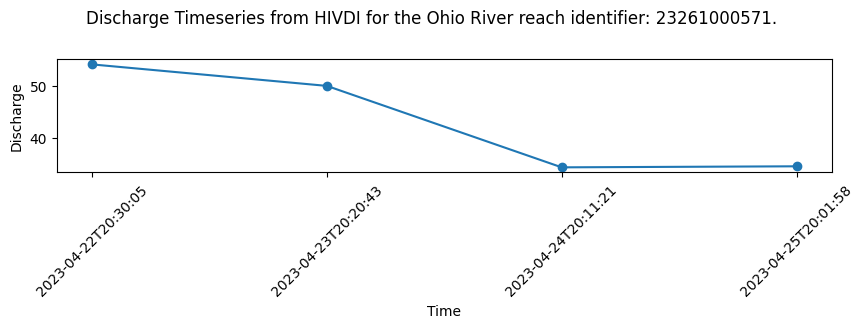

In [27]:
# Plot Discharge for the River Reach Identifier

# Set up plot
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(311)

# Plot data
ax1.scatter(time_str, discharge_algo_q)
ax1.plot(time_str, discharge_algo_q)

# Define labels and title
ax1.set_ylabel('Discharge')
ax1.set_xlabel('Time')
plt.xticks(rotation = 45)

plt.suptitle(f"Discharge Timeseries from HIVDI for the Ohio River reach identifier: {reach_id}.")

In [28]:
# Locate MOI discharge results for discharge algorithm making sure to filter out missing values
moi_q = results["moi"][DISCHARGE_ALGORITHM]["q"][data_index]
moi_q = moi_q[missing_reach_index]

print(f"{DISCHARGE_ALGORITHM.upper()} MOI Discharge for {RIVER_NAME} reach identfier # {reach_id}")
print(moi_q)

HIVDI MOI Discharge for Rhine reach identfier # 23261000571
[0.0009796  0.00062748 0.00012596 0.00014881]


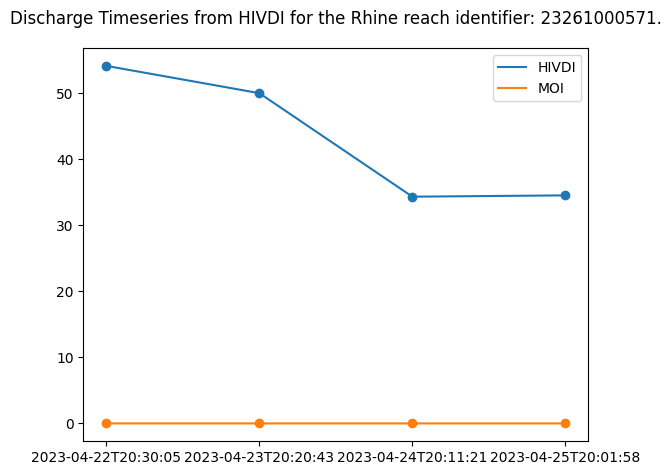

In [29]:
# Plot discharge algorithm alongside MOI discharge

# Discharge algorithm Q
plt.scatter(time_str, discharge_algo_q)
plt.plot(time_str, discharge_algo_q, label=f"{DISCHARGE_ALGORITHM.upper()}")

# MOI Q
plt.scatter(time_str, moi_q)
plt.plot(time_str, moi_q, label="MOI")

plt.suptitle(f"Discharge Timeseries from HIVDI for the {RIVER_NAME} reach identifier: {reach_id}.")
plt.legend()
plt.tight_layout()

In [30]:
priors.close()
results.close()